Characterization of the Optimal Policy and the Optimal Fair Policy in the Single-Step Setting

"Proposition 1. Under Assumption 1, the optimal policy in
the single-step setting is a group-agnostic threshold policy
that selects all the individuals in category 1, i.e., individuals
with score at least −U−/(U+ −U−)."

Definition 2. For any score x ∈ X, we say x is in one of
the following categories:
- We say x is in category 1, denoted as x ∈ C1, if
E [∆(x)] ≥0 and E [u(x)] ≥0.
- We say x is in category 3, denoted as x ∈ C3, if
E [∆(x)] ≥0 and E [u(x)] < 0.
- We say x is in category 4, denoted as x ∈ C4, if
E [∆(x)] < 0 and E [u(x)] < 0. \
Note that by Assumption 2, we do not have category 2 with
E [∆(x)] < 0 and E [u(x)] ≥0.

Assumption 2. U+/U− > C+/C−. \
Assumption 2 implies that if E[u(x)] ≥0 then E[∆(x)] ≥
0. The implications of this assumption become clear when
we categorize the scores in Definition 2.

In [12]:
import numpy as np
from scipy.stats import norm

# p : X -> [0,1]
# Sigmoid function is monotonic
def p(x):
    return 1 / (1 + np.exp(-x))

def expected(x, plus, minus):
    return p(x) * plus + (1-p(x)) * minus

def opt_step(X, u_plus, u_minus):
    return [x for x in X if expected(x, u_plus, u_minus) > 0]

0.006933747722205027 0.008284603725514872 3.856565746267769
0.18198492793923252 0.39460129624134765


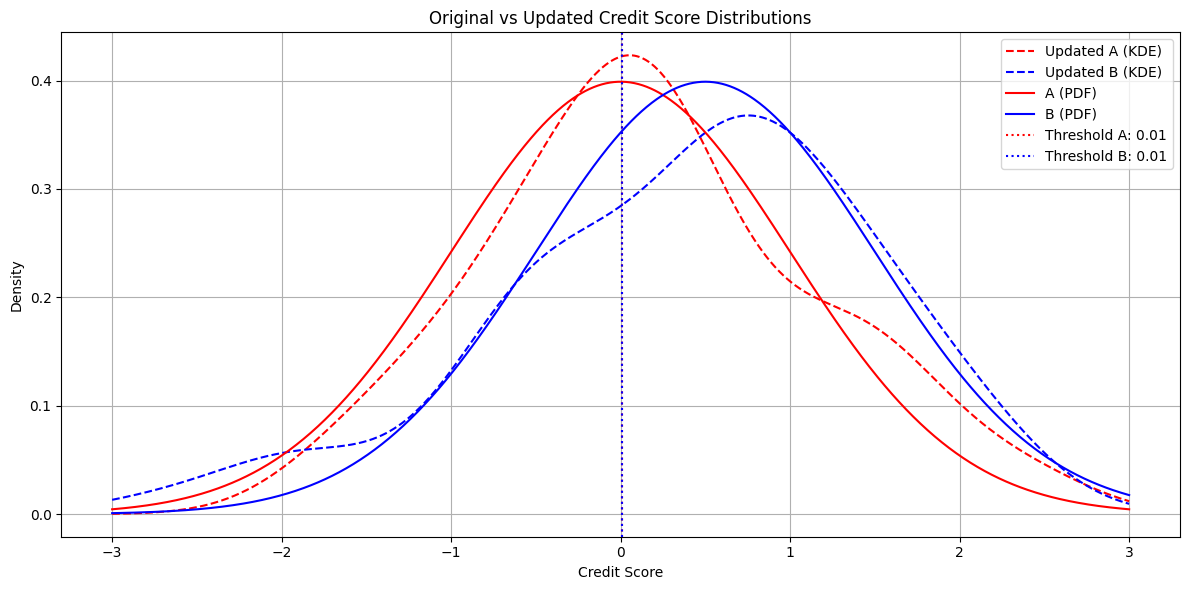

In [24]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# p : X -> [0,1]
# Sigmoid function is monotonic
def p(x):
    return 1 / (1 + np.exp(-x))

def expected(x, plus, minus):
    return p(x) * plus + (1-p(x)) * minus

def fair_opt_step(A, B, u_plus, u_minus, c_plus, c_minus, alpha):
    a_threshholds = np.sort(A)
    b_threshholds = np.sort(B)
    max_util =  -np.inf
    opt_a, opt_b = None, None
    updated_samples = (A, B)
    prob = 0.4

    w_a = len(A) / (len(A) + len(B))
    w_b = len(B) / (len(A) + len(B))

    for i in a_threshholds:
        a = []
        for sample in A:
            w = sample + expected(sample, c_plus, c_minus)
            if w < i:
                a.append(sample)
            elif w == i:
                if np.random.rand() < prob:
                    a.append(w)
                else:
                    a.append(sample)
            else:
                a.append(w)

        for j in b_threshholds:
            b = []
            for sample in B:
                w = sample + expected(sample, c_plus, c_minus)
                if w < j:
                    b.append(sample)
                elif sample == j:
                    if np.random.rand() < prob:
                       b.append(w) 
                    else:
                        b.append(sample)
                else:
                    b.append(w)

            if (np.abs(np.mean(a) - np.mean(b))) < alpha:
                util = w_a * expected(np.mean(a), u_plus, u_minus) + w_b * expected(np.mean(b), u_plus, u_minus)
                max_util = max(max_util, util)
                if max_util == util:
                    opt_a, opt_b = i, j
                    updated_samples = (a,b)
            else:
                continue
    return (opt_a, opt_b, max_util, updated_samples)

# Sample
n_samples = 100
A = np.random.normal(0, 1, n_samples)
B = np.random.normal(0.5, 1, n_samples)

# Run optimization step
opt_a, opt_b, max_util, updated_samples = fair_opt_step(A, B, 9, -3, .1, -.1, 0.5)
a, b = updated_samples

print(opt_a, opt_b, max_util)
print(np.mean(a), np.mean(b))

x_min = -3
x_max = 3

# KDE for updated A and B
kde_a = gaussian_kde(a)
x_a = np.linspace(x_min, x_max, 1000)
y_a = kde_a(x_a)

kde_b = gaussian_kde(b)
x_b = np.linspace(x_min, x_max, 1000)
y_b = kde_b(x_b)

# Theoretical distributions
mean_a, std_a = 0, 1
mean_b, std_b = 0.5, 1
x = np.linspace(x_min, x_max, 1000)
pdf_a = norm.pdf(x, mean_a, std_a)
pdf_b = norm.pdf(x, mean_b, std_b)

plt.figure(figsize=(12, 6))

# Plot updated KDE distributions
plt.plot(x_a, y_a, label='Updated A (KDE)', color='red', linestyle='--')
plt.plot(x_b, y_b, label='Updated B (KDE)', color='blue', linestyle='--')

# Plot original theoretical PDFs
plt.plot(x, pdf_a, label='A (PDF)', color='red', linestyle='-')
plt.plot(x, pdf_b, label='B (PDF)', color='blue', linestyle='-')

# Thresholds
plt.axvline(opt_a, color='red', linestyle=':', label=f'Threshold A: {opt_a:.2f}')
plt.axvline(opt_b, color='blue', linestyle=':', label=f'Threshold B: {opt_b:.2f}')

# Final plot settings
plt.title("Original vs Updated Credit Score Distributions")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

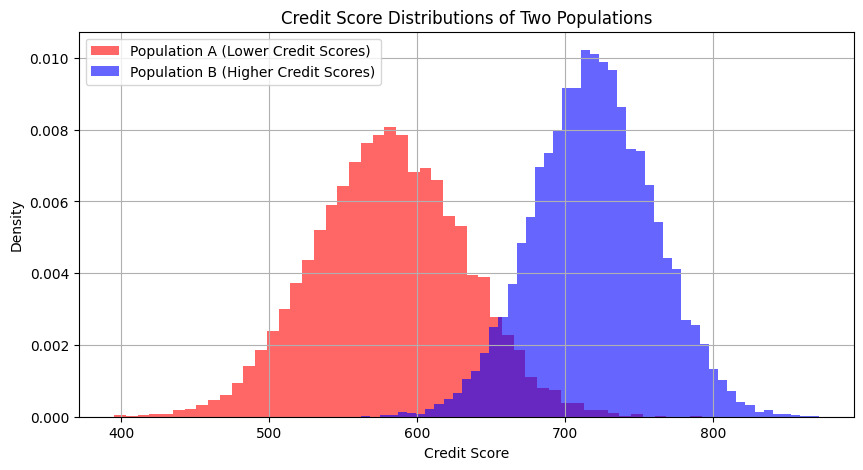

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_samples = 10000  # Number of samples per population

# Population A (e.g., subprime borrowers)
mean_a = 580
std_a = 50
population_a = np.random.normal(mean_a, std_a, n_samples)

# Population B (e.g., prime borrowers)
mean_b = 720
std_b = 40
population_b = np.random.normal(mean_b, std_b, n_samples)

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(population_a, bins=50, alpha=0.6, label='Population A (Lower Credit Scores)', color='red', density=True)
plt.hist(population_b, bins=50, alpha=0.6, label='Population B (Higher Credit Scores)', color='blue', density=True)
plt.title("Credit Score Distributions of Two Populations")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


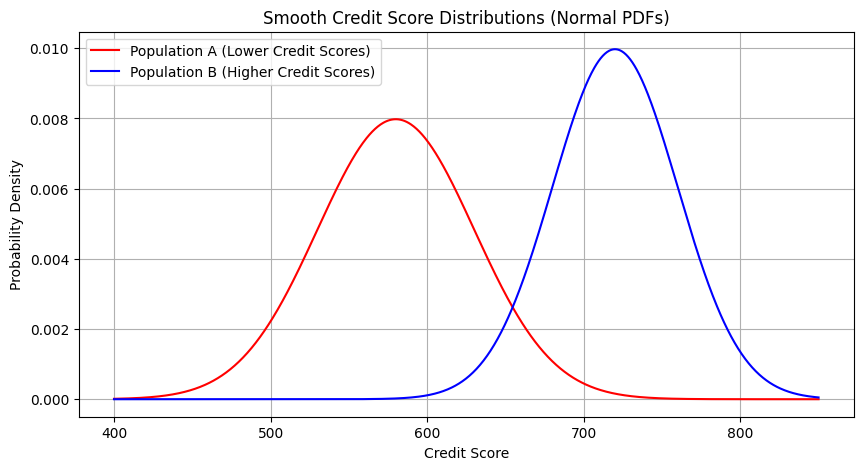

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mean_a, std_a = 580, 50
mean_b, std_b = 720, 40

# X range for plotting
x = np.linspace(x_min, x_max, 1000)

# Theoretical PDFs
pdf_a = norm.pdf(x, mean_a, std_a)
pdf_b = norm.pdf(x, mean_b, std_b)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, pdf_a, label='Population A (Lower Credit Scores)', color='red')
plt.plot(x, pdf_b, label='Population B (Higher Credit Scores)', color='blue')
plt.title("Smooth Credit Score Distributions (Normal PDFs)")
plt.xlabel("Credit Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()
